In [1]:
#pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas_datareader import data
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
'''Get Data'''

#df_raw = yf.download("^GSPC MMM ABT ACN ADBE AAP AES AFL A AKAM AGN ADS ALL GOOG MO AMZN AEE AIG APH APC AIV AAPL AMAT APTV ADM ARNC \
#                  T BBY COF CPRI CAH KMX CCL COST XRAY DVN", start='2009-12-30', end='2020-01-01', interval='1wk')

#APC is removed because it has been delisted; ARNC is removed because it underwent unknown restructuring in 2016, which leads to data \
#inconsistency (get different numbers from different databases(e.g. Yahoo Finance and WSJ))

df_raw = yf.download("^GSPC MMM ABT ACN ADBE AAP AES AFL A AKAM AGN ADS ALL GOOG MO AMZN AEE AIG APH AIV AAPL AMAT APTV ADM \
                       T BBY COF CPRI CAH KMX CCL COST XRAY DVN", start='2009-12-21', end='2020-01-01', interval='1wk')

df_unadj_close = df_raw['Close']
df_unadj_close.rename(columns={'^GSPC':'GSPC'},inplace=True)
df_unadj_close.dropna(how='all', inplace=True)

df_raw.drop(['Close'],axis=1,inplace=True)
df = df_raw.copy()
df_raw.head()

[*********************100%***********************]  34 of 34 completed


C:\Users\Alaaa\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
C:\Users\Alaaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Adj Close                                                         \
                    A        AAP       AAPL        ABT        ACN       ADBE   
Date                                                                           
2009-12-21  19.853561  40.208561  25.922182  18.125620  33.323753  37.169998   
2009-12-28  20.337967  39.390865  26.131752  18.072063  33.412315  36.779999   
2010-01-04  20.161219  39.546574  26.286753  18.426876  34.273785  36.689999   
2010-01-11  19.919027  38.252357  25.536520  18.574158  34.467014  35.869999   
2010-01-18  19.094250  38.670776  24.522150  18.526072  33.959789  34.380001   

                                                        ...      Volume       \
                  ADM        ADS        AEE        AES  ...        COST CPRI   
Date                                                    ...                    
2009-12-21  24.180721  61.544250  18.810987  10.952053  ...   9767300.0  NaN   
2009-12-28  23.981581  61.649242  18.428570  10.494733  ...   7084200.0  NaN   
2010-01-04  23.621582  64.598549  17.808790  10.865317  ...  16654800.0  NaN   
2010-01-11  23.391798  62.651432  18.026373  11.070323  ...  11222600.0  NaN   
2010-01-18  23.338188  58.528126  16.997801  10.266071  ...  14720200.0  NaN   

                                                                       \
                   DVN        GOOG        KMX         MMM          MO   
Date                                                                    
2009-12-21   9802300.0  14821800.0  6894800.0   7436800.0  53903500.0   
2009-12-28  10106600.0  11659400.0  4778800.0  10864500.0  35913600.0   
2010-01-04  16495000.0  40306500.0  7824800.0  19035100.0  69903500.0   
2010-01-11  13778400.0  56686000.0  6529800.0  15650000.0  64944200.0   
2010-01-18  11337600.0  41505700.0  9191900.0  17763800.0  65847800.0   

                                                  
                      T       XRAY         ^GSPC  
Date                                              
2009-12-21   68914500.0  2129300.0  1.205305e+10  
2009-12-28   71130700.0  1940100.0  9.561710e+09  
2010-01-04  163499400.0  5309600.0  2.111535e+10  
2010-01-11  200954300.0  4194200.0  2.181623e+10  
2010-01-18  151503300.0  4684100.0  2.261833e+10  

[5 rows x 170 columns]

In [3]:
'''Delete most null values'''

#df[df['Adj Close']['A'].isnull()==True]
df = df.dropna(how='all')
df = df[103:]
df

Adj Close                                                 \
                    A         AAP        AAPL        ABT         ACN   
Date                                                                   
2011-12-12  21.902416   66.661469   47.248707  21.276690   45.314030   
2011-12-19  23.146126   68.867210   50.015266  21.714705   44.259636   
2011-12-26  22.864655   68.318802   50.222366  21.796106   44.544144   
2012-01-02  24.481480   70.153603   52.380054  21.652693   43.372604   
2012-01-09  25.568098   70.114372   52.058880  21.486008   44.560894   
...               ...         ...         ...        ...         ...   
2019-12-02  82.036758  154.125870  270.069031  85.118484  201.769943   
2019-12-09  83.533600  154.713989  274.498535  85.984795  205.864120   
2019-12-16  85.010483  157.614685  278.778381  86.293495  210.287018   
2019-12-23  85.239998  157.903900  289.113831  87.030357  211.402710   
2019-12-30  85.130226  159.708801  292.954712  86.492645  209.759064   

                                                                     ...  \
                  ADBE        ADM         ADS        AEE        AES  ...   
Date                                                                 ...   
2011-12-12   28.200001  22.116121   98.310463  23.352678   9.067575  ...   
2011-12-19   28.290001  23.201965  100.925690  24.177505   9.359312  ...   
2011-12-26   28.270000  22.834698   99.112198  24.398436   9.335658  ...   
2012-01-02   28.719999  23.209953   97.871384  23.632534   9.643169  ...   
2012-01-09   28.969999  23.289789  101.202499  23.809284   9.974331  ...   
...                ...        ...         ...        ...        ...  ...   
2019-12-02  306.230011  43.567253  104.626213  74.240311  18.587982  ...   
2019-12-09  317.940002  44.847183  109.387367  74.072449  18.786573  ...   
2019-12-16  327.609985  45.432579  110.619904  76.105507  19.670296  ...   
2019-12-23  330.790009  45.938595  110.242195  75.837151  19.839096  ...   
2019-12-30  329.809998  45.988205  111.524422  76.334122  19.759661  ...   

                Volume                                                  \
                  COST        CPRI         DVN        GOOG         KMX   
Date                                                                     
2011-12-12  12704700.0  46258100.0  18894800.0  34094400.0  10100800.0   
2011-12-19  10509400.0   9582400.0  14794000.0  20687900.0  13999200.0   
2011-12-26   4386400.0   1693100.0   7720700.0  14235300.0   5106400.0   
2012-01-02  11587600.0   3919300.0  14905700.0  25126100.0   8394900.0   
2012-01-09  16022400.0   3534600.0  17415400.0  33726800.0  10683300.0   
...                ...         ...         ...         ...         ...   
2019-12-02   9772000.0  14017200.0  26211600.0   6719700.0   6072600.0   
2019-12-09  13214000.0   9725500.0  23586000.0   6129400.0   4577200.0   
2019-12-16  15394000.0  11532200.0  47580500.0   9558800.0  12627500.0   
2019-12-23   4394300.0   4028100.0  16198100.0   2936500.0   7605800.0   
2019-12-30   2789600.0   3377400.0   6941000.0   2012700.0   2678300.0   

                                                                          
                   MMM          MO            T       XRAY         ^GSPC  
Date                                                                      
2011-12-12  21256400.0  95486200.0  141156700.0  5984500.0  2.117657e+10  
2011-12-19  16963800.0  55036300.0  128707400.0  5550900.0  1.640051e+10  
2011-12-26   7977600.0  27268600.0   66605300.0  2301600.0  9.030550e+09  
2012-01-02  12343100.0  69039400.0  150257000.0  3218800.0  1.550907e+10  
2012-01-09  17443100.0  50428400.0  128162800.0  3839200.0  1.927394e+10  
...                ...         ...          ...        ...           ...  
2019-12-02  14372700.0  39482500.0  132364900.0  7487200.0  1.745239e+10  
2019-12-09  11558100.0  30362400.0  109393200.0  5598700.0  1.766988e+10  
2019-12-16  18130800.0  60067800.0  160659400.0  7495200.0  2.207813e+10  
2

In [4]:
'''Segregate adjusted close price data'''

df_close = df['Adj Close']
df_close.rename(columns={'^GSPC':'GSPC'},inplace=True)

df_close.head()

A        AAP       AAPL        ABT        ACN       ADBE  \
Date                                                                           
2011-12-12  21.902416  66.661469  47.248707  21.276690  45.314030  28.200001   
2011-12-19  23.146126  68.867210  50.015266  21.714705  44.259636  28.290001   
2011-12-26  22.864655  68.318802  50.222366  21.796106  44.544144  28.270000   
2012-01-02  24.481480  70.153603  52.380054  21.652693  43.372604  28.719999   
2012-01-09  25.568098  70.114372  52.058880  21.486008  44.560894  28.969999   

                  ADM         ADS        AEE       AES  ...       COST  \
Date                                                    ...              
2011-12-12  22.116121   98.310463  23.352678  9.067575  ...  65.580719   
2011-12-19  23.201965  100.925690  24.177505  9.359312  ...  67.240707   
2011-12-26  22.834698   99.112198  24.398436  9.335658  ...  66.176399   
2012-01-02  23.209953   97.871384  23.632534  9.643169  ...  64.437012   
2012-01-09  23.289789  101.202499  23.809284  9.974331  ...  64.024010   

                 CPRI        DVN        GOOG        KMX        MMM         MO  \
Date                                                                            
2011-12-12  24.100000  53.465248  311.811249  30.360001  63.498829  19.117004   
2011-12-19  27.000000  55.433945  315.387848  30.299999  66.179840  19.576235   
2011-12-26  27.250000  54.981682  321.744019  30.480000  65.801430  19.718311   
2012-01-02  26.000000  57.420372  323.796326  30.320000  67.121788  19.099831   
2012-01-09  26.559999  55.957172  311.328064  32.639999  67.306961  19.259439   

                    T       XRAY         GSPC  
Date                                           
2011-12-12  18.554096  32.824715  1219.660034  
2011-12-19  19.210081  33.743351  1265.329956  
2011-12-26  19.448036  33.137230  1257.599976  
2012-01-02  19.087885  33.378315  1277.810059  
2012-01-09  19.622717  34.231979  1289.089966  

[5 rows x 34 columns]

In [5]:
tickers = ['GSPC', 'MMM', 'ABT', 'ACN', 'ADBE', 'AAP', 'AES', 'AFL', 'A', 'AKAM', 'AGN', 'ADS', 'ALL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AIG',\
           'APH', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'T', 'BBY', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'COST', 'XRAY', 'DVN']

df_ln_return = df_close.copy()

def calculate_ln_return(ticker):
    df_ln_return[ticker] = np.log(df_close[ticker]/df_close[ticker].shift(1))
    return None

for ticker in tickers:
    calculate_ln_return(ticker)

df_ln_return.dropna(how='all',inplace=True)
df_ln_return

A       AAP      AAPL       ABT       ACN      ADBE  \
Date                                                                     
2011-12-19  0.055230  0.032553  0.056903  0.020378 -0.023544  0.003186   
2011-12-26 -0.012235 -0.007995  0.004132  0.003742  0.006408 -0.000707   
2012-01-02  0.068325  0.026502  0.042065 -0.006602 -0.026653  0.015793   
2012-01-09  0.043429 -0.000559 -0.006150 -0.007728  0.027029  0.008667   
2012-01-16  0.048473  0.045011  0.001167  0.023926  0.046955  0.051466   
...              ...       ...       ...       ...       ...       ...   
2019-12-02  0.017671 -0.015785  0.012863  0.000351  0.006886 -0.010719   
2019-12-09  0.018082  0.003809  0.016268  0.010126  0.020088  0.037526   
2019-12-16  0.017526  0.018575  0.015471  0.003584  0.021257  0.029961   
2019-12-23  0.002696  0.001833  0.036403  0.008503  0.005292  0.009660   
2019-12-30 -0.001289  0.011366  0.013198 -0.006198 -0.007805 -0.002967   

                 ADM       ADS       AEE       AES  ...      COST      CPRI  \
Date                                                ...                       
2011-12-19  0.047930  0.026254  0.034711  0.031667  ...  0.024997  0.113625   
2011-12-26 -0.015956 -0.018132  0.009096 -0.002531  ... -0.015955  0.009217   
2012-01-02  0.016300 -0.012598 -0.031895  0.032409  ... -0.026636 -0.046957   
2012-01-09  0.003434  0.033469  0.007451  0.033765  ... -0.006430  0.021310   
2012-01-16  0.029389  0.022936 -0.021574  0.031897  ...  0.009876  0.099886   
...              ...       ...       ...       ...  ...       ...       ...   
2019-12-02  0.022571 -0.015554  0.011504 -0.010098  ... -0.016343  0.026307   
2019-12-09  0.028955  0.044501 -0.002264  0.010627  ... -0.010497  0.016903   
2019-12-16  0.012969  0.011205  0.027077  0.045967  ...  0.010090 -0.016379   
2019-12-23  0.011076 -0.003420 -0.003532  0.008545  ... -0.002445 -0.016385   
2019-12-30  0.001079  0.011564  0.006532 -0.004012  ... -0.000646  0.016385   

                 DVN      GOOG       KMX       MMM        MO         T  \
Date                                                                     
2011-12-19  0.036160  0.011405 -0.001978  0.041354  0.023738  0.034745   
2011-12-26 -0.008192  0.019953  0.005923 -0.005734  0.007231  0.012311   
2012-01-02  0.043399  0.006358 -0.005263  0.019867 -0.031868 -0.018692   
2012-01-09 -0.025813 -0.039267  0.073731  0.002755  0.008322  0.027634   
2012-01-16  0.003006 -0.064433 -0.005838  0.024226 -0.009018  0.014527   
...              ...       ...       ...       ...       ...       ...   
2019-12-02  0.055533  0.026960  0.001130  0.009964  0.014185  0.021700   
2019-12-09  0.014586  0.005364  0.005224 -0.015753 -0.004972  0.001569   
2019-12-16  0.085203  0.001305 -0.054266  0.038243  0.019154  0.022996   
2019-12-23  0.010156  0.001703 -0.047604  0.010720 -0.014380  0.002296   
2019-12-30  0.009284 -0.011060 -0.008292 -0.004750  0.006659 -0.004086   

                XRAY      GSPC  
Date                            
2011-12-19  0.027602  0.036761  
2011-12-26 -0.018126 -0.006128  
2012-01-02  0.007249  0.015943  
2012-01-09  0.025254  0.008789  
2012-01-16  0.056296  0.020189  
...              ...       ...  
2019-12-02  0.026356  0.001568  
2019-12-09 -0.029190  0.007250  
2019-12-16  0.008302  0.016407  
2019-12-23 -0.000176  0.005819  
2019-12-30 -0.002659 -0.002856  

[420 rows x 34 columns]

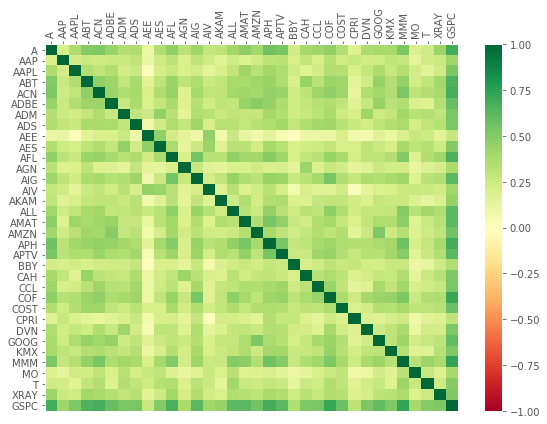

In [6]:
'''Correlation heatmap'''

def correlation_matrix(df):
    df_corr = df.corr()
    data = df_corr.values
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0])+0.5,minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5,minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_lables = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_lables)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()
    
correlation_matrix(df_ln_return)

In [7]:
'''Create a function that does pre-processes panel data'''

def Split_Panel_Data_Preparations(df):
    df = df.T
    df.reset_index(inplace=True)
    df.rename(columns={'index':'Ticker'},inplace=True)
    for i in range(1,df.shape[1]):
        new_date=str(df.columns[i])[:4]+\
                 str(df.columns[i])[5:7]+\
                 str(df.columns[i])[8:10]
        df.rename(columns={df.columns[i]: str(i)+'_'+new_date},inplace=True)
    return df

In [8]:
df_ln_return_copy = df_ln_return.copy()
df_ln_return_copy = Split_Panel_Data_Preparations(df_ln_return_copy)
df_ln_return_copy.drop(33,inplace=True)
df_ln_return_copy

Date Ticker  1_20111219  2_20111226  3_20120102  4_20120109  5_20120116  \
0         A    0.055230   -0.012235    0.068325    0.043429    0.048473   
1       AAP    0.032553   -0.007995    0.026502   -0.000559    0.045011   
2      AAPL    0.056903    0.004132    0.042065   -0.006150    0.001167   
3       ABT    0.020378    0.003742   -0.006602   -0.007728    0.023926   
4       ACN   -0.023544    0.006408   -0.026653    0.027029    0.046955   
5      ADBE    0.003186   -0.000707    0.015793    0.008667    0.051466   
6       ADM    0.047930   -0.015956    0.016300    0.003434    0.029389   
7       ADS    0.026254   -0.018132   -0.012598    0.033469    0.022936   
8       AEE    0.034711    0.009096   -0.031895    0.007451   -0.021574   
9       AES    0.031667   -0.002531    0.032409    0.033765    0.031897   
10      AFL    0.051684    0.004169    0.022401   -0.024251    0.103947   
11      AGN    0.032081   -0.028429    0.046467   -0.015947   -0.067662   
12      AIG    0.035328   -0.042200    0.014549    0.058173    0.027670   
13      AIV    0.051408   -0.001744    0.001744   -0.015368    0.052156   
14     AKAM    0.180757    0.010902    0.014760   -0.016621   -0.005602   
15      ALL    0.043662   -0.007632    0.022011    0.033687    0.028909   
16     AMAT    0.046344   -0.010218    0.027626    0.043543    0.080979   
17     AMZN   -0.022202   -0.023861    0.053483   -0.023212    0.067767   
18      APH    0.094185   -0.006807    0.018337    0.040692    0.139536   
19     APTV    0.045219   -0.018400    0.045823    0.095109    0.012024   
20      BBY    0.003873    0.003859    0.042706    0.002886    0.028811   
21      CAH    0.000488   -0.008582    0.028398   -0.007487    0.033142   
22      CCL   -0.020281   -0.016710    0.008238    0.040786   -0.082672   
23      COF   -0.006706   -0.018972    0.065661    0.079361   -0.060280   
24     COST    0.024997   -0.015955   -0.026636   -0.006430    0.009876   
25     CPRI    0.113625    0.009217   -0.046957    0.021310    0.099886   
26      DVN    0.036160   -0.008192    0.043399   -0.025813    0.003006   
27     GOOG    0.011405    0.019953    0.006358   -0.039267   -0.064433   
28      KMX   -0.001978    0.005923   -0.005263    0.073731   -0.005838   
29      MMM    0.041354   -0.005734    0.019867    0.002755    0.024226   
30       MO    0.023738    0.007231   -0.031868    0.008322   -0.009018   
31        T    0.034745    0.012311   -0.018692    0.027634    0.014527   
32     XRAY    0.027602   -0.018126    0.007249    0.025254    0.056296   

Date  6_20120123  7_20120130  8_20120206  9_20120213  ...  411_20191028  \
0       0.040158    0.059135   -0.025499   -0.022916  ...      0.020741   
1       0.007995    0.020622    0.039136    0.067433  ...     -0.004480   
2       0.062216    0.027346    0.070830    0.017478  ...      0.036788   
3      -0.013360   -0.000363    0.001998    0.022429  ...      0.012294   
4       0.010871    0.032950   -0.023424    0.025480  ...      0.027743   
5       0.017872    0.025439    0.011240    0.016626  ...      0.024928   
6      -0.007351   -0.009096    0.033935    0.025195  ...      0.034040   
7       0.017452    0.045766    0.020215    0.014229  ...     -0.036339   
8      -0.000948    0.005049   -0.014585    0.018669  ...      0.010003   
9      -0.019328    0.008550   -0.003101    0.061720  ...      0.041393   
10      0.023312    0.018987   -0.033570   -0.006643  ...      0.006550   
11      0.027148   -0.029386   -0.000345    0.037069  ...      0.025276   
12     -0.015717    0.073287   -0.018949    0.021155  ...      0.018018   
13      0.034266    0.015305    0.001996    0.010317  ...      0.017166   
14     -0.000937    0.049668    0.133123   -0.016529  ...     -0.018682   
15     -0.025120    0.053543    0.009082    0.013470  ...     -0.012574   
16     -0.019433    0.044771    0.012432    0.003084  ...     -0.004677   
17      0.022988   -0.040157   -0.011468   -0.016520  ...      0.016951   
18     -0.017309    0.01

In [9]:
'''Split panel data to multiple cross-sections'''
for i in range(df_ln_return_copy.shape[1]-1):
    exec("df_ln_return_%s=df_ln_return_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_ln_return_%s.rename(columns={df_ln_return_copy.columns[i+1]:'ln_return'},inplace=True)"%(i+1))
    exec("df_ln_return_%s.rename(columns={'Ticker':df_ln_return_copy.columns[i+1]},inplace=True)"%(i+1))

In [10]:
'''Standard Deviation'''
#the process of calculating rolling standard deviation creates 49 columns of null values
df_vol = df_ln_return.rolling(window=50, min_periods=50).std() 
df_vol_copy = df_vol.copy()
df_vol_copy = Split_Panel_Data_Preparations(df_vol_copy)
df_vol_copy.drop(33,inplace=True)

for i in range(df_vol_copy.shape[1]-1):
    exec("df_vol_%s=df_vol_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_vol_%s.rename(columns={df_vol_copy.columns[i+1]:'vol'},inplace=True)"%(i+1))
    exec("df_vol_%s.rename(columns={'Ticker':df_vol_copy.columns[i+1]},inplace=True)"%(i+1))

[Text(0.5, 1.0, 'Standard Deviation Mean')]

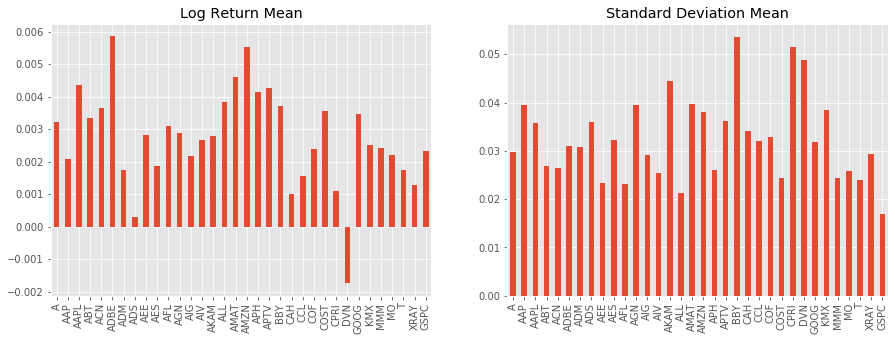

In [11]:
fig_descriptive, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize = (15,5))

df_ln_return.describe().iloc[1].plot(kind='bar', ax=ax0)
ax0.set(title="Log Return Mean")
df_vol.describe().iloc[1].plot(kind='bar', ax=ax1)
ax1.set(title="Standard Deviation Mean")

In [12]:
#Technical Factors
df_excess_sp500_return = df_ln_return.copy()
for i in range(df_excess_sp500_return.shape[1]):
    df_excess_sp500_return.iloc[:,i] = df_excess_sp500_return.iloc[:,i] - df_excess_sp500_return['GSPC']
df_excess_sp500_return_1wk = df_excess_sp500_return.shift(1)
df_excess_sp500_return_1mo = df_excess_sp500_return.rolling(window=4, min_periods=4).sum()
df_excess_sp500_return_1yr = df_excess_sp500_return.rolling(window=50, min_periods=50).sum()

In [13]:
df_excess_sp500_return_1wk = Split_Panel_Data_Preparations(df_excess_sp500_return_1wk)
df_excess_sp500_return_1mo = Split_Panel_Data_Preparations(df_excess_sp500_return_1mo)
df_excess_sp500_return_1yr = Split_Panel_Data_Preparations(df_excess_sp500_return_1yr)

for i in range(df_excess_sp500_return_1wk.shape[1]-1):
    exec("df_excess_sp500_return_1wk_%s=df_excess_sp500_return_1wk.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_excess_sp500_return_1wk_%s.rename(columns={df_excess_sp500_return_1wk.columns[i+1]:'exsp_return_1wk'},inplace=True)"%(i+1))
    exec("df_excess_sp500_return_1wk_%s.rename(columns={'Ticker':df_excess_sp500_return_1wk.columns[i+1]},inplace=True)"%(i+1))

for i in range(df_excess_sp500_return_1mo.shape[1]-1):
    exec("df_excess_sp500_return_1mo_%s=df_excess_sp500_return_1mo.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_excess_sp500_return_1mo_%s.rename(columns={df_excess_sp500_return_1mo.columns[i+1]:'exsp_return_1mo'},inplace=True)"%(i+1))
    exec("df_excess_sp500_return_1mo_%s.rename(columns={'Ticker':df_excess_sp500_return_1mo.columns[i+1]},inplace=True)"%(i+1))

for i in range(df_excess_sp500_return_1yr.shape[1]-1):
    exec("df_excess_sp500_return_1yr_%s=df_excess_sp500_return_1yr.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_excess_sp500_return_1yr_%s.rename(columns={df_excess_sp500_return_1yr.columns[i+1]:'exsp_return_1yr'},inplace=True)"%(i+1))
    exec("df_excess_sp500_return_1yr_%s.rename(columns={'Ticker':df_excess_sp500_return_1yr.columns[i+1]},inplace=True)"%(i+1))

In [14]:
'''Liquidity Factor'''
df_volume = df['Volume'][1:]
df_volume.drop(['^GSPC'],axis=1,inplace=True)

df_MktCap = pd.read_csv("df_MktCap.csv")
df_MktCap = df_MktCap[-420:]
df_MktCap.drop(['ARNC'],axis=1,inplace=True)
df_MktCap.set_index('Date',inplace=True)

df_volume_MktCap_ratio = df_volume.copy()
for ticker in df_volume.columns:
    df_volume_MktCap_ratio[ticker] = df_volume[ticker].rolling(window=50, min_periods=50).mean()/df_MktCap[ticker]
    
df_volume_MktCap_ratio_copy = df_volume_MktCap_ratio.copy()
df_volume_MktCap_ratio_copy = Split_Panel_Data_Preparations(df_volume_MktCap_ratio_copy)
df_volume_MktCap_ratio_copy.fillna(df_volume_MktCap_ratio_copy.mean(), inplace = True)

for i in range(df_volume_MktCap_ratio_copy.shape[1]-1):
    exec("df_volume_MktCap_ratio_%s=df_volume_MktCap_ratio_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_volume_MktCap_ratio_%s.rename(columns={df_volume_MktCap_ratio_copy.columns[i+1]:'Liquidity'},inplace=True)"%(i+1))
    exec("df_volume_MktCap_ratio_%s.rename(columns={'Ticker':df_volume_MktCap_ratio_copy.columns[i+1]},inplace=True)"%(i+1))

In [15]:
'''Price Level Factor'''
df_EPS = pd.read_csv('df_EPS.csv')
df_EPS = df_EPS[-420:]
df_EPS.drop(['ARNC'], axis=1, inplace=True)
df_EPS.set_index('Date',inplace=True)

df_earningstoprice_ratio = df_close.copy()[1:]
for ticker in df_EPS.columns:
    df_earningstoprice_ratio[ticker] = df_EPS[ticker]/df_close[ticker]

df_earningstoprice_ratio_copy = df_earningstoprice_ratio.copy()
df_earningstoprice_ratio_copy = Split_Panel_Data_Preparations(df_earningstoprice_ratio_copy)
df_earningstoprice_ratio_copy.drop(33, inplace=True)
df_earningstoprice_ratio_copy.fillna(df_earningstoprice_ratio_copy.mean(), inplace = True)

for i in range(df_earningstoprice_ratio_copy.shape[1]-1):
    exec("df_earningstoprice_ratio_%s=df_earningstoprice_ratio_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_earningstoprice_ratio_%s.rename(columns={df_earningstoprice_ratio_copy.columns[i+1]:'E2P'},inplace=True)"%(i+1))
    exec("df_earningstoprice_ratio_%s.rename(columns={'Ticker':df_earningstoprice_ratio_copy.columns[i+1]},inplace=True)"%(i+1))

In [16]:
'''Growth Factor'''
df_ROA = pd.read_csv('df_ROA.csv')[-420:]
df_ROA.drop(['ARNC'], axis=1, inplace=True)
df_ROA.set_index('Date',inplace=True)
df_ROA.index = df_ln_return.index

df_ROA_copy = df_ROA.copy()
df_ROA_copy = Split_Panel_Data_Preparations(df_ROA_copy)
df_ROA_copy.fillna(df_ROA_copy.mean(), inplace = True)

for i in range(df_ROA_copy.shape[1]-1):
    exec("df_ROA_%s=df_ROA_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_ROA_%s.rename(columns={df_ROA_copy.columns[i+1]:'ROA'},inplace=True)"%(i+1))
    exec("df_ROA_%s.rename(columns={'Ticker':df_ROA_copy.columns[i+1]},inplace=True)"%(i+1))

In [17]:
'''Add Independent Variable Data to Each Cross-section Dataframe'''
for i in range(1, df_ln_return_copy.shape[1]-1):
    exec("df_ln_return_%s['vol']=df_vol_%s['vol']"%(i+1,i))
    exec("df_ln_return_%s['exsp_return_1wk']=df_excess_sp500_return_1wk_%s['exsp_return_1wk']"%(i+1,i))
    exec("df_ln_return_%s['exsp_return_1mo']=df_excess_sp500_return_1mo_%s['exsp_return_1mo']"%(i+1,i))
    exec("df_ln_return_%s['exsp_return_1yr']=df_excess_sp500_return_1yr_%s['exsp_return_1yr']"%(i+1,i))
    exec("df_ln_return_%s['Liquidity']=df_volume_MktCap_ratio_%s['Liquidity']"%(i+1,i))
    exec("df_ln_return_%s['E2P']=df_earningstoprice_ratio_%s['E2P']"%(i+1,i))
    exec("df_ln_return_%s['ROA']=df_ROA_%s['ROA']"%(i+1,i))

C:\Users\Alaaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
'''Load in the dataframe that stores the result'''

df_res = pd.read_csv('df_res_time2.csv')
df_res.rename(columns={'Unnamed: 0':' '},inplace=True)
df_res.set_index(' ', inplace=True)
df_res

1  2  3  4  5  6  7  8  9  10  ...  362  363  364  365  \
                                                     ...                       
vol_coef              0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0   
exsp_return_1wk_coef  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0   
exsp_return_1mo_coef  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0   
exsp_return_1yr_coef  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0   
Liquidity_coef        0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0   
E2P_coef              0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0   
ROA_coef              0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0   
vol_p                 0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0   
exsp_return_1wk_p     0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0   
exsp_return_1mo_p     0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0   
exsp_return_1yr_p     0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0   
Liquidity_p           0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0   
E2P_p                 0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0   
ROA_p                 0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0   
Adj_R2                0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0   
Prob_F                0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0   

                      366  367  368  369  370  371  
                                                    
vol_coef                0    0    0    0    0    0  
exsp_return_1wk_coef    0    0    0    0    0    0  
exsp_return_1mo_coef    0    0    0    0    0    0  
exsp_return_1yr_coef    0    0    0    0    0    0  
Liquidity_coef          0    0    0    0    0    0  
E2P_coef                0    0    0    0    0    0  
ROA_coef                0    0    0    0    0    0  
vol_p                   0    0    0    0    0    0  
exsp_return_1wk_p       0    0    0    0    0    0  
exsp_return_1mo_p       0    0    0    0    0    0  
exsp_return_1yr_p       0    0    0    0    0    0  
Liquidity_p             0    0    0    0    0    0  
E2P_p                   0    0    0    0    0    0  
ROA_p                   0    0    0    0    0    0  
Adj_R2                  0    0    0    0    0    0  
Prob_F                  0    0    0    0    0    0  

[16 rows x 371 columns]

In [19]:
'''Cross-section regressions'''

for i in range(51,421):
#from 12/19/2011 to 12/30/2019
    exec("Exog = sm.add_constant(df_ln_return_%s[['vol', 'exsp_return_1wk', 'exsp_return_1mo', 'exsp_return_1yr', 'Liquidity', 'E2P', 'ROA']],\
                                 prepend=False)"%i)
    exec("model = sm.OLS(df_ln_return_%s['ln_return'], Exog, data=df_ln_return_%s)"%(i,i))
    res = model.fit()
    res_as_html = res.summary().tables[1].as_html()
    res_as_df = pd.read_html(res_as_html, header=0, index_col=0)[0]
    res_as_html_2 = res.summary().tables[0].as_html()
    res_as_df_2 = pd.read_html(res_as_html_2, header=0, index_col=0)[0]

    vol_coef = res_as_df['coef'][0]
    exsp_return_1wk_coef = res_as_df['coef'][1]
    exsp_return_1mo_coef = res_as_df['coef'][2]
    exsp_return_1yr_coef = res_as_df['coef'][3]
    Liquidity_coef = res_as_df['coef'][4]
    E2P_coef = res_as_df['coef'][5]
    ROA_coef = res_as_df['coef'][6]

    df_res.iloc[0,i-51] = vol_coef
    df_res.iloc[1,i-51] = exsp_return_1wk_coef
    df_res.iloc[2,i-51] = exsp_return_1mo_coef
    df_res.iloc[3,i-51] = exsp_return_1yr_coef
    df_res.iloc[4,i-51] = Liquidity_coef
    df_res.iloc[5,i-51] = E2P_coef
    df_res.iloc[6,i-51] = ROA_coef

    vol_p = res_as_df['P>|t|'][0]
    exsp_return_1wk_p = res_as_df['P>|t|'][1]
    exsp_return_1mo_p = res_as_df['P>|t|'][2]
    exsp_return_1yr_p = res_as_df['P>|t|'][3]
    Liquidity_p = res_as_df['P>|t|'][4]
    E2P_p = res_as_df['P>|t|'][5]
    ROA_p = res_as_df['P>|t|'][6]

    df_res.iloc[7,i-51] = vol_p
    df_res.iloc[8,i-51] = exsp_return_1wk_p
    df_res.iloc[9,i-51] = exsp_return_1mo_p
    df_res.iloc[10,i-51] = exsp_return_1yr_p
    df_res.iloc[11,i-51] = Liquidity_p
    df_res.iloc[12,i-51] = E2P_p
    df_res.iloc[13,i-51] = ROA_p

    Adj_R2 = res_as_df_2.iloc[0,2]
    Prob_F = res_as_df_2.iloc[2,2]

    df_res.iloc[14,i-51] = Adj_R2
    df_res.iloc[15,i-51] = Prob_F

Dates = df_ln_return.index
#Dates[0].strftime('%D')

df_res_copy = df_res.T
df_res_copy['Dates'] = Dates[-371:]

C:\Users\Alaaa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
df_res_copy

vol_coef  exsp_return_1wk_coef  exsp_return_1mo_coef  \
1     -1.5473                0.1703               -0.2116   
2     -0.8469                0.1344               -0.1051   
3      0.8697                0.1303                0.1521   
4     -1.0617                0.2378               -0.2147   
5      0.3089                0.0262               -0.0110   
..        ...                   ...                   ...   
367    0.6791                0.4918                0.1447   
368   -0.2043                0.0376                0.2274   
369   -0.4486               -0.1807                0.1622   
370   -0.0440               -0.0873                0.0801   
371    0.0000                0.0000                0.0000   

     exsp_return_1yr_coef  Liquidity_coef  E2P_coef  ROA_coef  vol_p  \
1                  0.0408    7.780000e-06   -0.0290   -0.0700  0.038   
2                 -0.0174   -6.853000e-07   -0.0169   -0.0388  0.126   
3                  0.0233   -3.403000e-07   -0.0009    0.0046  0.279   
4                  0.0350    9.112000e-06   -0.0136   -0.0875  0.011   
5                 -0.0407   -4.312000e-06    0.0222    0.0442  0.601   
..                    ...             ...       ...       ...    ...   
367                0.0092    9.906000e-07    0.0981   -0.0548  0.087   
368                0.0205    1.200000e-05    0.1104   -0.0822  0.695   
369               -0.0169   -2.210000e-06   -0.0204   -0.0412  0.189   
370                0.0051    3.721000e-06    0.0409    0.0326  0.814   
371                0.0000    0.000000e+00    0.0000    0.0000  0.000   

     exsp_return_1wk_p  exsp_return_1mo_p  exsp_return_1yr_p  Liquidity_p  \
1                0.448              0.180              0.289        0.263   
2                0.408              0.348              0.582        0.899   
3                0.575              0.407              0.550        0.959   
4                0.145              0.008              0.099        0.038   
5                0.893              0.933              0.178        0.435   
..                 ...                ...                ...          ...   
367              0.004              0.242              0.674        0.861   
368              0.889              0.108              0.520        0.112   
369              0.361              0.067              0.356        0.614   
370              0.475              0.240              0.643        0.154   
371              0.000              0.000              0.000        0.000   

     E2P_p  ROA_p  Adj_R2  Prob_F      Dates  
1    0.174  0.450   0.012  0.4200 2012-11-26  
2    0.316  0.584  -0.015  0.5000 2012-12-03  
3    0.967  0.962  -0.043  0.5850 2012-12-10  
4    0.283  0.124   0.166  0.1100 2012-12-17  
5    0.212  0.574  -0.019  0.5110 2012-12-24  
..     ...    ...     ...     ...        ...  
367  0.145  0.522   0.308  0.0189 2019-12-02  
368  0.152  0.474   0.028  0.3750 2019-12-09  
369  0.669  0.565   0.057  0.3020 2019-12-16  
370  0.136  0.435  -0.019  0.5120 2019-12-23  
371  0.000  0.000   0.000  0.0000 2019-12-30  

[371 rows x 17 columns]

[Text(0.5, 1.0, 'Time series of Prob(F)')]

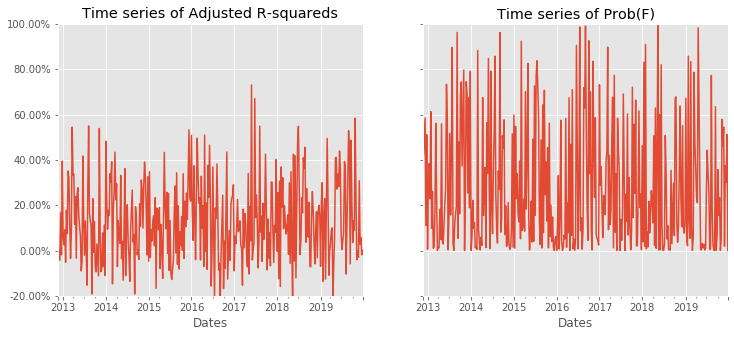

In [21]:
'''Plots of regression quality'''
fig_res_R2, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize = (12,5), sharey=True)

df_res_copy.plot(x='Dates', y='Adj_R2', ax=ax0, legend=False)
ax0.set(title='Time series of Adjusted R-squareds')
ax0.set_ylim(-0.2, 1)
ax0.set_yticklabels(['{:,.2%}'.format(x) for x in ax0.get_yticks()])

df_res_copy.plot(x='Dates', y='Prob_F', ax=ax1, legend=False)
ax1.set(title='Time series of Prob(F)')

[Text(0.5, 1.0, 'Distribution of coefficients of Standard Deviation')]

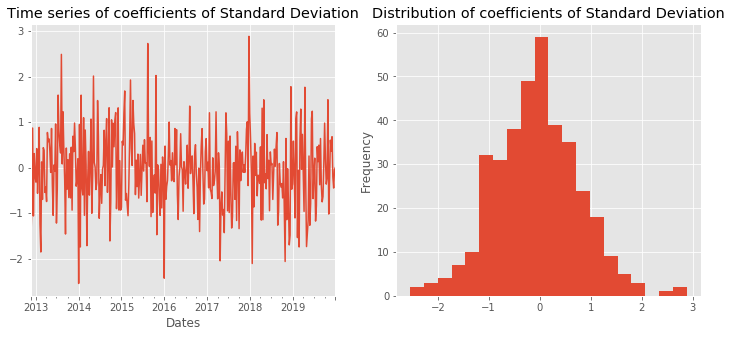

In [22]:
'''Plots of standard deviation coefficients'''
fig_res_vol, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize = (12,5))

df_res_copy.plot(x='Dates', y='vol_coef', ax=ax0, legend=False)
ax0.set(title="Time series of coefficients of Standard Deviation")

df_res_copy.plot(kind='hist', y='vol_coef', bins=20, ax=ax1, legend=False)
ax1.set(title="Distribution of coefficients of Standard Deviation")

In [23]:
(df_res_copy['vol_coef'].skew(), df_res_copy['vol_coef'].mean())

(0.1545197476009829, -0.05239676549865231)

In [24]:
'''Calculate moving averages of coefficients and make predictions'''
df_coef_ma = df_res_copy.rolling(window=50, min_periods=50).mean()[49:]


#Cross-section regression used rolling on a basis of 50, then used variables at t-1 to regress variables at t, so the first 50 cross-sections\
#are removed; prediction used another rolling,so 51 to 99 cross-sections are removed. Also, we cannot add realized return for the last cross-section.
for i in range(100, 420):
    
    for j in df_coef_ma.columns[:7]:
        exec("df_ln_return_%s[j] = df_coef_ma.loc[str(%d),j]"%(i,i-49))
        
    exec("df_ln_return_%s['E_return'] = df_ln_return_%s['vol']*df_ln_return_%s['vol_coef'] + \
                                        df_ln_return_%s['exsp_return_1wk']*df_ln_return_%s['exsp_return_1wk_coef'] + \
                                        df_ln_return_%s['exsp_return_1mo']*df_ln_return_%s['exsp_return_1mo_coef'] + \
                                        df_ln_return_%s['exsp_return_1yr']*df_ln_return_%s['exsp_return_1yr_coef'] + \
                                        df_ln_return_%s['Liquidity']*df_ln_return_%s['Liquidity_coef'] + \
                                        df_ln_return_%s['E2P']*df_ln_return_%s['E2P_coef'] + \
                                        df_ln_return_%s['ROA']*df_ln_return_%s['ROA_coef']"%(i,i,i,i,i,i,i,i,i,i,i,i,i,i,i))
    exec("df_ln_return_%s['Realized_return'] = df_ln_return_%s['ln_return']"%(i,i+1))


C:\Users\Alaaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
'''Split stocks into 3 tiers, sorted on expected returns'''
dict_tiers = {'Expected_return': {}, 'Realized_return':{}, 'Volatility':{}}

for i in range(100,420):
    exec("df_sort = df_ln_return_%s.sort_values(by='E_return', ascending=False)"%i)
    dict_tiers['Expected_return'][i] = {}
    dict_tiers['Realized_return'][i] = {}
    dict_tiers['Volatility'][i] = {}
    dict_tiers['Expected_return'][i][1] = df_sort[0:11]['E_return'].mean()
    dict_tiers['Expected_return'][i][2] = df_sort[11:22]['E_return'].mean()
    dict_tiers['Expected_return'][i][3] = df_sort[22:33]['E_return'].mean()
    dict_tiers['Realized_return'][i][1] = df_sort[0:11]['Realized_return'].mean()
    dict_tiers['Realized_return'][i][2] = df_sort[11:22]['Realized_return'].mean()
    dict_tiers['Realized_return'][i][3] = df_sort[22:33]['Realized_return'].mean()
    dict_tiers['Volatility'][i][1] = df_sort[0:11]['vol'].mean()
    dict_tiers['Volatility'][i][2] = df_sort[11:22]['vol'].mean()
    dict_tiers['Volatility'][i][3] = df_sort[22:33]['vol'].mean()

df_E_return_tiers = pd.DataFrame(dict_tiers['Expected_return']).T
df_R_return_tiers = pd.DataFrame(dict_tiers['Realized_return']).T
df_vol_tiers = pd.DataFrame(dict_tiers['Volatility']).T

df_E_return_tiers.rename(columns={1:'E_high', 2:'E_medium', 3:'E_low'}, inplace = True)
df_R_return_tiers.rename(columns={1:'R_high', 2:'R_medium', 3:'R_low'}, inplace = True)
df_vol_tiers.rename(columns={1:'Vol_high', 2:'Vol_medium', 3:'Vol_low'}, inplace = True)

df_E_return_tiers['dates'] = Dates[99:419]
df_R_return_tiers['dates'] = Dates[99:419]
df_vol_tiers['dates'] = Dates[99:419]

df_pred = df_E_return_tiers.merge(df_R_return_tiers, how='outer', on='dates')
df_pred = df_pred.merge(df_vol_tiers, how='outer', on='dates')
df_pred['GSPC'] = pd.Series(df_ln_return[-424:-1].reset_index()['GSPC'])

[]

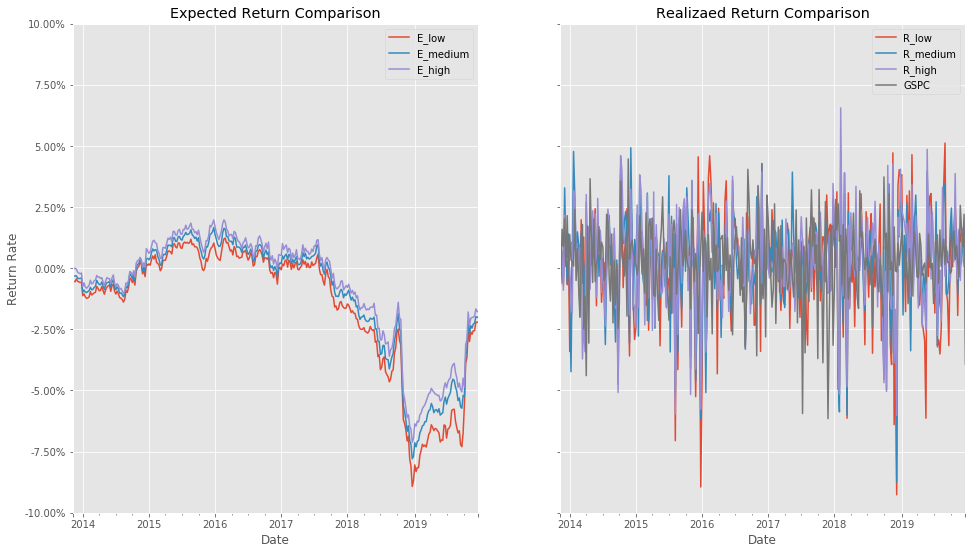

In [26]:
'''Compare S&P500 returns with realized returns in 3 tiers '''
fig_R_return_comp, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize = (16,9), sharey=True)

df_pred.plot(x='dates', y=['E_low', 'E_medium', 'E_high'], ax=ax0)
ax0.set(xlabel='Date', ylabel='Return Rate', title="Expected Return Comparison")
ax0.set_ylim(-0.1, 0.1)
ax0.set_yticklabels(['{:,.2%}'.format(x) for x in ax0.get_yticks()])

df_pred.plot(x='dates', y=['R_low', 'R_medium', 'R_high', 'GSPC'], ax=ax1)
ax1.set(xlabel='Date', title="Realizaed Return Comparison")
ax1.set_yticklabels(['{:,.2%}'.format(x) for x in ax1.get_yticks()])

In [27]:
print(df_pred['R_high'].skew(), df_pred['R_high'].mean())
print(df_pred['R_medium'].skew(), df_pred['R_medium'].mean())
print(df_pred['R_low'].skew(), df_pred['R_low'].mean())
(df_pred['GSPC'].skew(), df_pred['GSPC'].mean())

-0.42090195901753447 0.0031272617053998745
-0.7843829422395268 0.00227339527846328
-0.7601213766982301 0.00033896932343395947


(-0.5753811681384403, 0.0025544684980994222)

In [40]:
'''Divide the prediction results into 11 tiers'''
dict_11tiers = {'Expected_return': {}, 'Realized_return':{}, 'Volatility':{}}

for i in range(100,420):
    exec("df_sort = df_ln_return_%s.sort_values(by='E_return', ascending=False)"%i)
    dict_11tiers['Expected_return'][i] = {}
    dict_11tiers['Realized_return'][i] = {}
    dict_11tiers['Volatility'][i] = {}
    
    dict_11tiers['Expected_return'][i][1] = df_sort[0:3]['E_return'].mean()
    dict_11tiers['Expected_return'][i][2] = df_sort[3:6]['E_return'].mean()
    dict_11tiers['Expected_return'][i][3] = df_sort[6:9]['E_return'].mean()
    dict_11tiers['Expected_return'][i][4] = df_sort[9:12]['E_return'].mean()
    dict_11tiers['Expected_return'][i][5] = df_sort[12:15]['E_return'].mean()
    dict_11tiers['Expected_return'][i][6] = df_sort[15:18]['E_return'].mean()
    dict_11tiers['Expected_return'][i][7] = df_sort[18:21]['E_return'].mean()
    dict_11tiers['Expected_return'][i][8] = df_sort[21:24]['E_return'].mean()
    dict_11tiers['Expected_return'][i][9] = df_sort[24:27]['E_return'].mean()
    dict_11tiers['Expected_return'][i][10] = df_sort[27:30]['E_return'].mean()
    dict_11tiers['Expected_return'][i][11] = df_sort[30:33]['E_return'].mean()

    dict_11tiers['Realized_return'][i][1] = df_sort[0:3]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][2] = df_sort[3:6]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][3] = df_sort[6:9]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][4] = df_sort[9:12]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][5] = df_sort[12:15]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][6] = df_sort[15:18]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][7] = df_sort[18:21]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][8] = df_sort[21:24]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][9] = df_sort[24:27]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][10] = df_sort[27:30]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][11] = df_sort[30:33]['Realized_return'].mean()

    dict_11tiers['Volatility'][i][1] = df_sort[0:3]['vol'].mean()
    dict_11tiers['Volatility'][i][2] = df_sort[3:6]['vol'].mean()
    dict_11tiers['Volatility'][i][3] = df_sort[6:9]['vol'].mean()
    dict_11tiers['Volatility'][i][4] = df_sort[9:12]['vol'].mean()
    dict_11tiers['Volatility'][i][5] = df_sort[12:15]['vol'].mean()
    dict_11tiers['Volatility'][i][6] = df_sort[15:18]['vol'].mean()
    dict_11tiers['Volatility'][i][7] = df_sort[18:21]['vol'].mean()
    dict_11tiers['Volatility'][i][8] = df_sort[21:24]['vol'].mean()
    dict_11tiers['Volatility'][i][9] = df_sort[24:27]['vol'].mean()
    dict_11tiers['Volatility'][i][10] = df_sort[27:30]['vol'].mean()
    dict_11tiers['Volatility'][i][11] = df_sort[30:33]['vol'].mean()

df_E_return_11tiers = pd.DataFrame(dict_11tiers['Expected_return']).T
df_R_return_11tiers = pd.DataFrame(dict_11tiers['Realized_return']).T
df_vol_11tiers = pd.DataFrame(dict_11tiers['Volatility']).T

df_E_return_11tiers.rename(columns={1:'E_1', 2:'E_2', 3:'E_3', 4:'E_4', 5:'E_5', 6:'E_6', 7:'E_7', 8:'E_8', 9:'E_9', 10:'E_10', 11:'E_11'},\
                           inplace = True)
df_R_return_11tiers.rename(columns={1:'R_1', 2:'R_2', 3:'R_3', 4:'R_4', 5:'R_5', 6:'R_6', 7:'R_7', 8:'R_8', 9:'R_9', 10:'R_10', 11:'R_11'},\
                           inplace = True)
df_vol_11tiers.rename(columns={1:'v_1', 2:'v_2', 3:'v_3', 4:'v_4', 5:'v_5', 6:'v_6', 7:'v_7', 8:'v_8', 9:'v_9', 10:'v_10', 11:'v_11'},\
                           inplace = True)

df_E_return_11tiers['dates'] = Dates[99:419]
df_R_return_11tiers['dates'] = Dates[99:419]
df_vol_11tiers['dates'] = Dates[99:419]

df_pred_11tiers = df_E_return_11tiers.merge(df_R_return_11tiers, how='outer', on='dates')
df_pred_11tiers = df_pred_11tiers.merge(df_vol_11tiers, how='outer', on='dates')

[Text(0, 0.5, 'Realizaed Return'),
 Text(0.5, 0, 'Volatility'),
 Text(0.5, 1.0, 'Tier 1 Expected Return')]

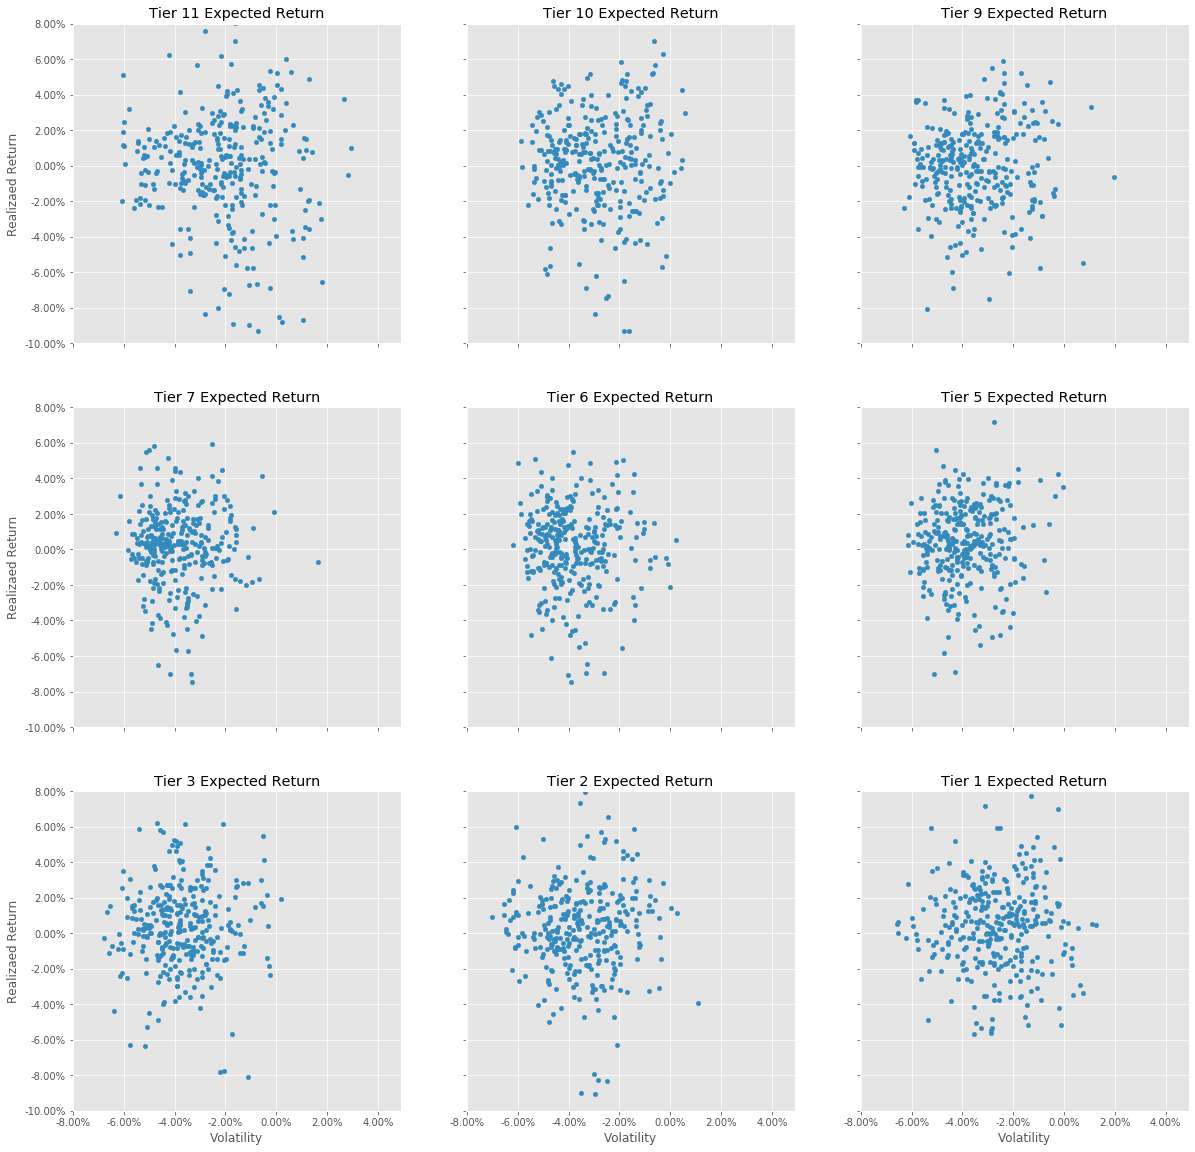

In [41]:
'''Scatter plots of realized returns against volatility'''
fig_pred_11tiers, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(nrows=3,ncols=3, figsize = (20,20), sharex=True, sharey=True)

#From tier 1 to tier 11, expected returns are decreasing
df_pred_11tiers.plot(kind='scatter', x='v_11', y='R_11', ax=ax0, legend=False)
ax0.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 11 Expected Return")
ax0.set_ylim(-0.1, 0.08)
ax0.set_yticklabels(['{:,.2%}'.format(x) for x in ax0.get_yticks()])
ax0.set_xticklabels(['{:,.2%}'.format(x) for x in ax0.get_yticks()])

df_pred_11tiers.plot(kind='scatter', x='v_10', y='R_10', ax=ax1, legend=False)
ax1.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 10 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_9', y='R_9', ax=ax2, legend=False)
ax2.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 9 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_7', y='R_7', ax=ax3, legend=False)
ax3.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 7 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_6', y='R_6', ax=ax4, legend=False)
ax4.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 6 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_5', y='R_5', ax=ax5, legend=False)
ax5.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 5 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_3', y='R_3', ax=ax6, legend=False)
ax6.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 3 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_2', y='R_2', ax=ax7, legend=False)
ax7.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 2 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_1', y='R_1', ax=ax8, legend=False)
ax8.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 1 Expected Return")